# Eksplorujemy modele `speech-to-text`: `openai/whisper-1`

## Czym jest model `whisper-1`?
 
* Model `whisper-1` jest modelem do rozpoznawania mowy.
* Dostępny jest za pośrednictwem API OpenAI.
* Model ten jest w stanie rozpoznać mowę w wielu językach.
* Potrafi zwrócić cały tekst na raz lub pojedyncze słowa i zdania wraz z czasem ich wystąpienia.
* Wejście: nagranie audio
* Wyjście: tekst oraz opcjonalnie czas wystąpienia słów

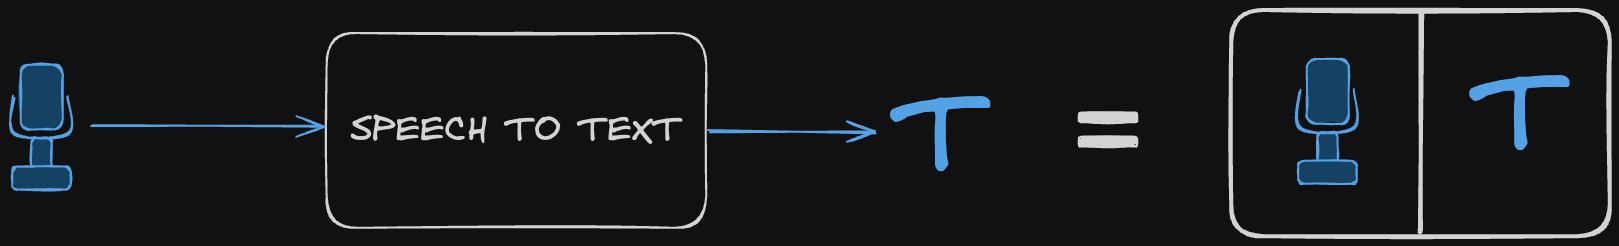

## Instalujemy wymagane biblioteki (conda wymagana)

- otwórz terminal
- uruchom `conda activate od_zera_do_ai`
- uruchom `conda install -y openai==1.47.0 python-dotenv`

In [ ]:
from dotenv import dotenv_values
from IPython.display import Markdown
from openai import OpenAI

In [ ]:
env = dotenv_values(".env")

openai_client = OpenAI(api_key=env["OPENAI_API_KEY"])

## Jak używać modelu `whisper-1` do rozpoznawania mowy?

In [ ]:
with open("audio_about_ai.mp3", "rb") as f:
    transcript = openai_client.audio.transcriptions.create(
        file=f,
        model="whisper-1",
    )

In [ ]:
Markdown(transcript.text)

In [ ]:
# sprawdźmy jak dobrze `whisper-1` poradził sobie z tekstem
with open("audio_about_ai.txt", "r") as f:
    print(f.read())

## Jak używać modelu `whisper-1` do rozpoznania języka mówionego?

In [ ]:
with open("audio_about_ai.mp3", "rb") as f:
    transcript = openai_client.audio.transcriptions.create(
        file=f,
        model="whisper-1",
        response_format="verbose_json",
    )

In [ ]:
transcript.language

## Jak używać modelu `whisper-1` do detekcji wystąpień słów?

In [ ]:
with open("audio_about_ai.mp3", "rb") as f:
    transcript = openai_client.audio.transcriptions.create(
        file=f,
        model="whisper-1",
        response_format="verbose_json",
        timestamp_granularities=["word", "segment"],
    )

In [ ]:
transcript.words